In [2]:
%matplotlib inline

Plant disease identifier 

Load the Dataset

In [4]:
from datasets import load_dataset

ds = load_dataset("fakewave07/plant-diseases-dataset")

Resolving data files:   0%|          | 0/23112 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/33 [00:00<?, ?it/s]

📊 Exploring the Data

In [5]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 23112
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 33
    })
})


In [6]:
ds['train'].features['label'].names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [7]:
from datasets import DatasetDict
split_ds = ds['train'].train_test_split(test_size=0.1, seed=42)
plant_ds = DatasetDict({
    'train': split_ds['train'],
    'validation': split_ds['test'],
    'test': ds['test'] 
})

In [8]:
label_names = plant_ds['train'].features['label'].names
print(f"Total classes: {len(label_names)}")
print(label_names[:10])  

Total classes: 38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight']


Number of classes = 38

In [9]:
plant_ds['train'].features

{'image': Image(mode=None, decode=True, id=None),
 'label': ClassLabel(names=['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_lea

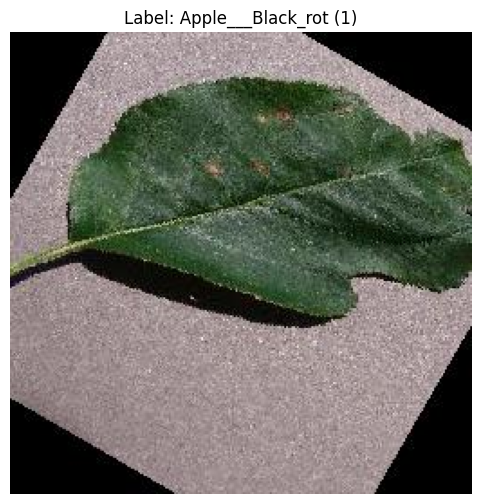

In [10]:
import matplotlib.pyplot as plt
import random
label_names = plant_ds['train'].features['label'].names

i = random.randint(0, len(plant_ds['train']) - 1)
sample = plant_ds['train'][i]

img = sample['image']
label_idx = sample['label']
label_name = label_names[label_idx]

plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Label: {label_name} ({label_idx})")
plt.axis('off')
plt.show()

In [11]:
print("Type:", type(img))
print("Mode:", img.mode)
print("Size:", img.size)

Type: <class 'PIL.JpegImagePlugin.JpegImageFile'>
Mode: RGB
Size: (256, 256)


Shape: (256, 256, 3)


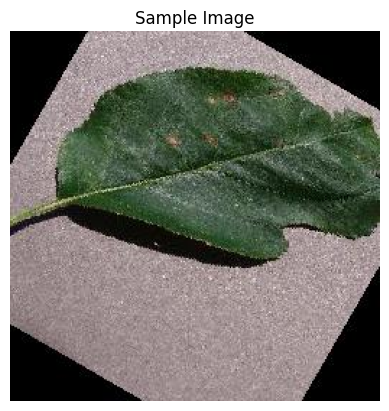

In [12]:
import numpy as np

img_np = np.array(img)  # Convert from PIL to numpy
print("Shape:", img_np.shape)  # Should be (H, W, 3)

plt.imshow(img_np)
plt.title("Sample Image")
plt.axis("off")
plt.show()

In [13]:
from collections import Counter
import pandas as pd
train_labels = plant_ds['train']['label']
label_counts = Counter(train_labels)
label_names = plant_ds['train'].features['label'].names
label_freq = {label_names[i]: count for i, count in label_counts.items()}
df = pd.DataFrame.from_dict(label_freq, orient='index', columns=['count'])
df = df.sort_values('count', ascending=False)
df['percentage'] = 100 * df['count'] / df['count'].sum()

df.head(10)


,count,percentage
Apple___healthy,1816,8.730769
Apple___Apple_scab,1803,8.668269
Apple___Black_rot,1790,8.605769
Corn_(maize)___Common_rust_,1749,8.408654
Corn_(maize)___Northern_Leaf_Blight,1714,8.240385
Corn_(maize)___healthy,1674,8.048077
Cherry_(including_sour)___healthy,1646,7.913462
Blueberry___healthy,1633,7.850962
Apple___Cedar_apple_rust,1580,7.596154
Cherry_(including_sour)___Powdery_mildew,1495,7.187500


<Figure size 1200x800 with 0 Axes>

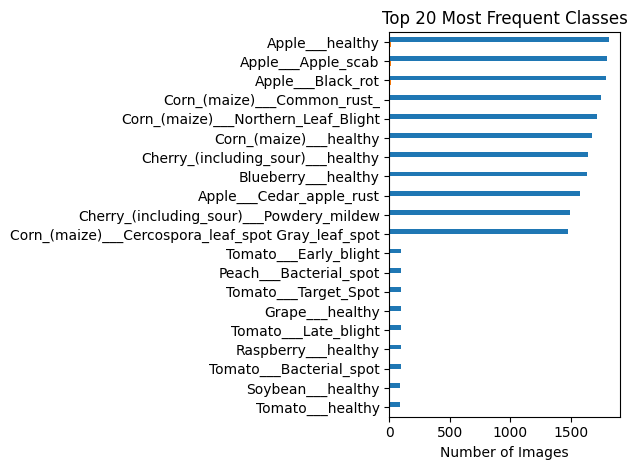

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
df.head(20).plot(kind='barh', legend=False)
plt.title("Top 20 Most Frequent Classes")
plt.xlabel("Number of Images")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

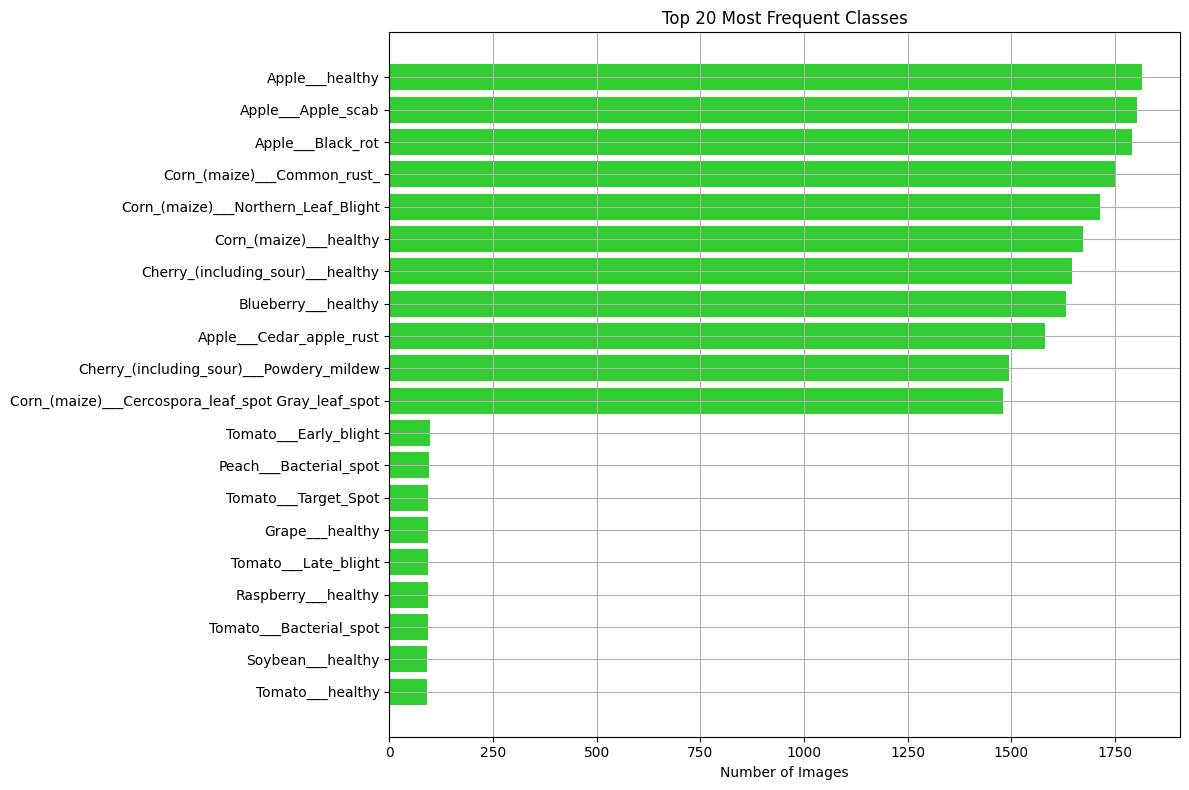

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')

import matplotlib.pyplot as plt

top_df = df.head(20)


plt.figure(figsize=(12, 8))
plt.barh(top_df.index, top_df['count'], color='limegreen')
plt.title("Top 20 Most Frequent Classes")
plt.xlabel("Number of Images")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("top_20_class_distribution.png")

In [15]:
print(df.head(10))
print("Total rows in df:", len(df))
print("Any NaNs?\n", df.isnull().sum())


                                          count  percentage
Apple___healthy                            1816    8.730769
Apple___Apple_scab                         1803    8.668269
Apple___Black_rot                          1790    8.605769
Corn_(maize)___Common_rust_                1749    8.408654
Corn_(maize)___Northern_Leaf_Blight        1714    8.240385
Corn_(maize)___healthy                     1674    8.048077
Cherry_(including_sour)___healthy          1646    7.913462
Blueberry___healthy                        1633    7.850962
Apple___Cedar_apple_rust                   1580    7.596154
Cherry_(including_sour)___Powdery_mildew   1495    7.187500
Total rows in df: 38
Any NaNs?
 count         0
percentage    0
dtype: int64


In [16]:
train_labels = plant_ds['train']['label']

In [17]:
from collections import Counter
import pandas as pd

label_names = plant_ds['train'].features['label'].names
labels = plant_ds['train']['label']
label_counts = Counter(labels)
df = pd.DataFrame.from_dict(
    {label_names[i]: c for i, c in label_counts.items()},
    orient='index', columns=['count']
)
df = df.sort_values('count', ascending=False)
df['percentage'] = 100 * df['count'] / df['count'].sum()

print(df.head())


                                     count  percentage
Apple___healthy                       1816    8.730769
Apple___Apple_scab                    1803    8.668269
Apple___Black_rot                     1790    8.605769
Corn_(maize)___Common_rust_           1749    8.408654
Corn_(maize)___Northern_Leaf_Blight   1714    8.240385


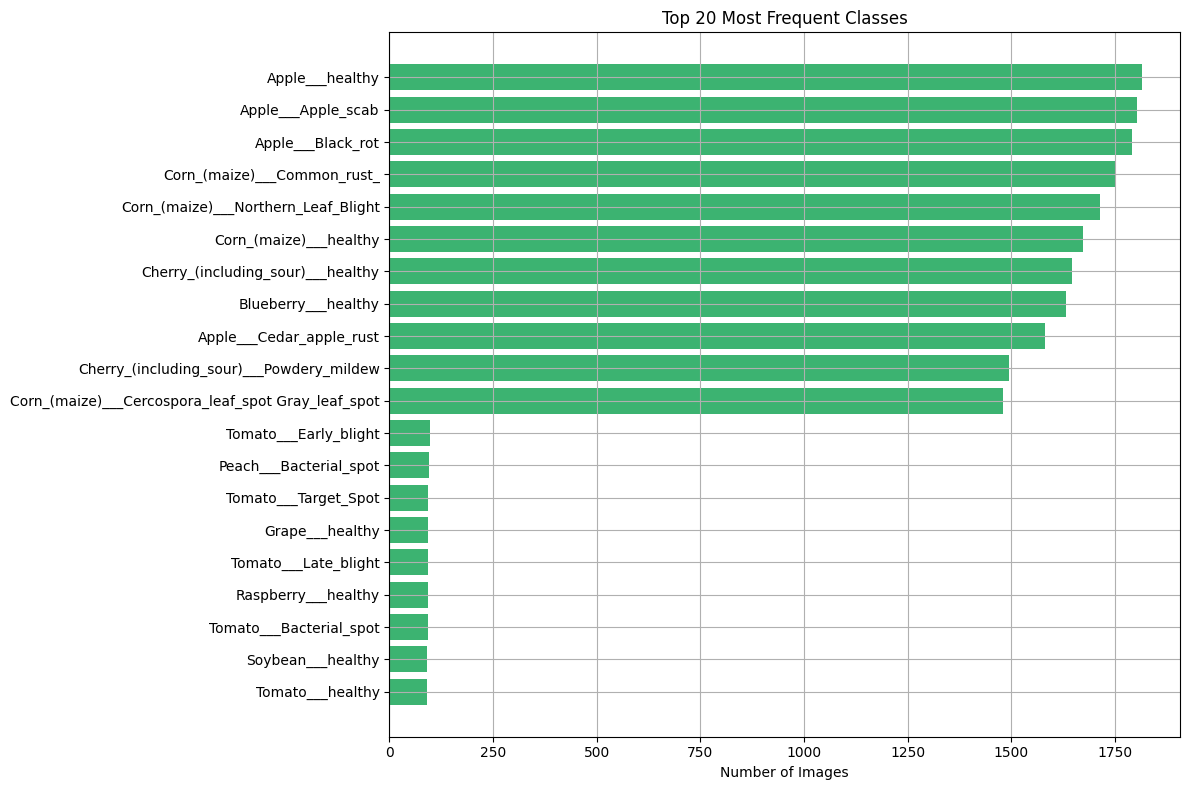

In [18]:
plt.figure(figsize=(12, 8))
plt.barh(df.head(20).index, df.head(20)['count'], color='mediumseagreen')
plt.title("Top 20 Most Frequent Classes")
plt.xlabel("Number of Images")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


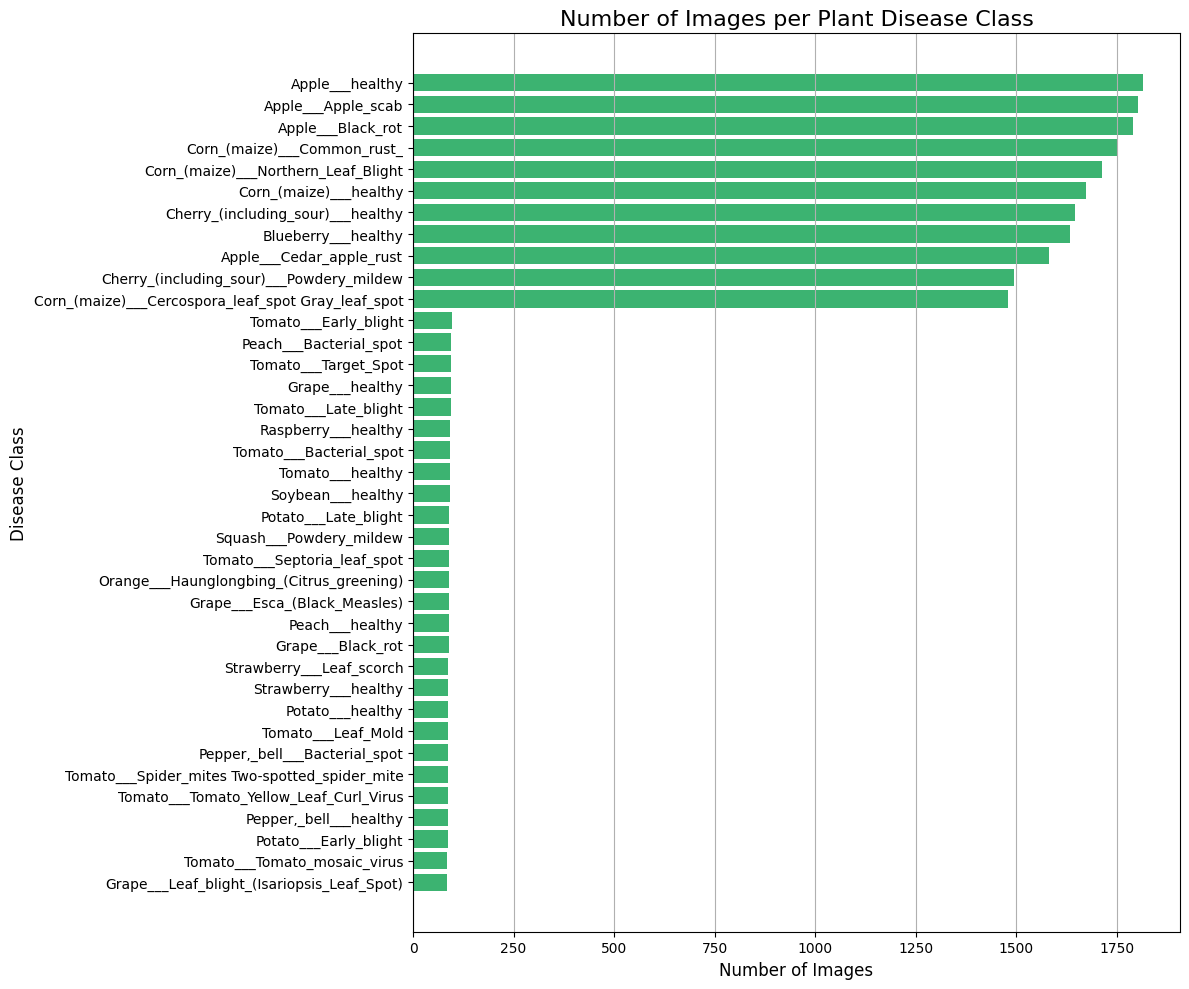

In [19]:
import matplotlib.pyplot as plt

# Sort and take top 20 if needed
df_sorted = df.sort_values('count', ascending=False)

plt.figure(figsize=(12, 10))
plt.barh(df_sorted.index, df_sorted['count'], color='mediumseagreen')
plt.title("Number of Images per Plant Disease Class", fontsize=16)
plt.xlabel("Number of Images", fontsize=12)
plt.ylabel("Disease Class", fontsize=12)
plt.grid(axis='x')
plt.gca().invert_yaxis()  # highest count at top
plt.tight_layout()
plt.show()


Skewed Categorical Distribution, 
Thus, Distribution Type: Power-law, Long Tail 

Noise Type: Rare classes like tomato diseases can be seen as stochastic noise since they might be underrepresented in the data and NO OUTLIERS because no label has absurdly low or high counts 
MILD STOCHASTIC IMBALANCE, NO OUTLIER NATURE DETECTED.

Fixation: Data Augmentation for underrepresented cls.
Customise theta values to penalize the loss
Weighted loss + data augmentation

Data Cleaning 🧼

In [20]:
from torchvision import transforms
IMG_SIZE = 224
train_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(IMG_SIZE, scale=(0.8, 1.0)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  
])

test_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [21]:
from torch.utils.data import Dataset

class PlantDataset(Dataset):
    def __init__(self, hf_dataset, transform=None):
        self.dataset = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item['image'].convert("RGB")  
        label = item['label']
        if self.transform:
            image = self.transform(image)
        return image, label


In [22]:
train_ds = PlantDataset(plant_ds['train'], transform=train_transforms)
val_ds = PlantDataset(plant_ds['validation'], transform=test_transforms)
test_ds = PlantDataset(plant_ds['test'], transform=test_transforms)


In [23]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

labels = plant_ds['train']['label']
unique_classes = np.unique(labels)
weights = compute_class_weight(class_weight='balanced',
                                classes=unique_classes,
                                y=labels)

class_weights = torch.tensor(weights, dtype=torch.float32)


In [24]:
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

In [25]:
import torch
print(torch.backends.mps.is_available())  
print(torch.device("mps"))                


True
mps


In [26]:
import torch

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)


Using device: mps


In [27]:
from transformers import AutoImageProcessor, AutoModelForImageClassification

model_ckpt = "google/vit-base-patch16-224"

processor = AutoImageProcessor.from_pretrained(model_ckpt)

model = AutoModelForImageClassification.from_pretrained(
    model_ckpt,
    ignore_mismatched_sizes=True, 
    num_labels=38  
)

model.to(device)



Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([38]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([38, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [28]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")


Training 🏋

In [31]:
import torch
from torch.utils.data import Dataset
from transformers import ViTImageProcessor, ViTForImageClassification, TrainingArguments, Trainer
from PIL import Image

processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=len(plant_ds['train'].features['label'].names),
    ignore_mismatched_sizes=True
)

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)

class CustomDataset(Dataset):
    def __init__(self, hf_dataset, processor):
        self.dataset = hf_dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        image = item["image"].convert("RGB")
        label = item["label"]

        inputs = self.processor(image, return_tensors="pt")
        inputs = {k: v.squeeze(0) for k, v in inputs.items()}
        inputs["label"] = torch.tensor(label)
        return inputs

train_dataset = CustomDataset(plant_ds["train"], processor)
val_dataset = CustomDataset(plant_ds["validation"], processor)

from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./vit-plant-results",
    learning_rate=5e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=1,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)
trainer.train()
model.save_pretrained("./final_plantD")
processor.save_pretrained("./final_plantD")



Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
10,3.474800
20,3.164800
30,2.798000
40,2.507600
50,2.279900
60,2.160900
70,1.864400
80,1.814100
90,1.612600
100,1.540700


['./final_plantD/preprocessor_config.json']

Evaluation 💪

100%|██████████| 2312/2312 [00:33<00:00, 68.65it/s]


Accuracy: 0.9913

Classification Report:

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      1.00      1.00       213
                                 Apple___Black_rot       1.00      1.00      1.00       197
                          Apple___Cedar_apple_rust       1.00      1.00      1.00       180
                                   Apple___healthy       0.99      1.00      1.00       192
                               Blueberry___healthy       1.00      1.00      1.00       183
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       188
                 Cherry_(including_sour)___healthy       1.00      0.99      0.99       180
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.98      0.97       162
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       158
               Corn_(maize)___Norther

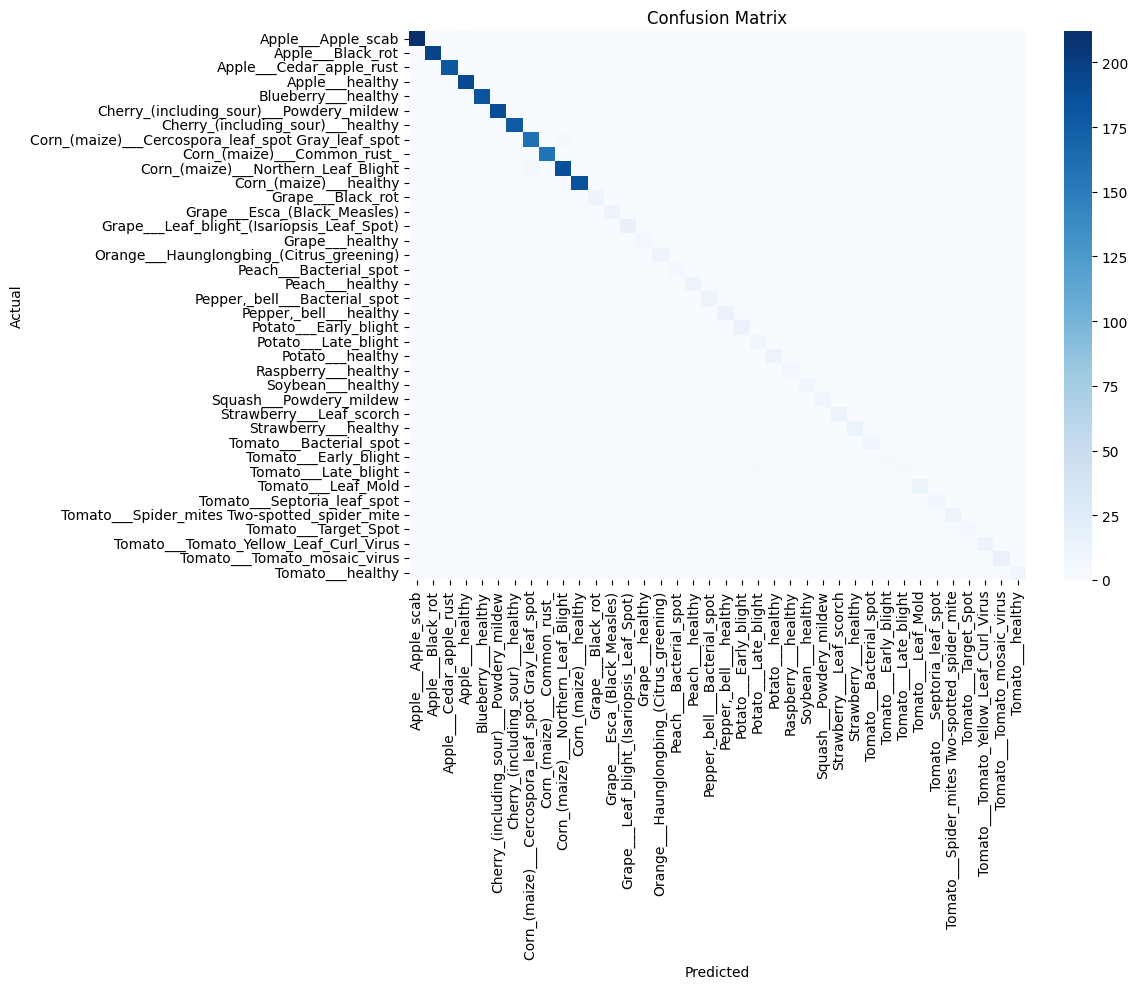

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import torch
from tqdm import tqdm

model.eval()
all_preds = []
all_labels = []

for batch in tqdm(val_dataset):
    pixel_values = batch['pixel_values'].unsqueeze(0).to(device)
    labels = batch['label']

    with torch.no_grad():
        outputs = model(pixel_values)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

    all_preds.extend(preds.cpu().numpy())
    all_labels.append(labels)

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

print(f"Accuracy: {accuracy_score(all_labels, all_preds):.4f}")
print("\nClassification Report:\n")
print(classification_report(all_labels, all_preds, target_names=plant_ds['train'].features['label'].names))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, xticklabels=plant_ds['train'].features['label'].names,
            yticklabels=plant_ds['train'].features['label'].names, 
            annot=False, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Testing 🧪

In [1]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch

model_path = "./final_plantD"  
model = ViTForImageClassification.from_pretrained(model_path)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_path)
model.eval()  

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
model.to(device)
img = Image.open("/Users/ayaanhussain/Desktop/Road To MIT/GreenSync-main/TESTDATA/Screenshot 2025-07-08 at 7.12.03 PM.png").convert("RGB")  # replace with your test file
inputs = feature_extractor(images=img, return_tensors="pt").to(device)

# Predict
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()

label_names = model.config.id2label  
predicted_label = label_names[predicted_class_idx]

print(f"Predicted class: {predicted_label}")


/Users/ayaanhussain/Library/Python/3.11/lib/python/site-packages/tensorflow/python/keras/engine/training_arrays_v1.py:37: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.sparse import issparse  # pylint: disable=g-import-not-at-top
/Users/ayaanhussain/Library/Python/3.11/lib/python/site-packages/transformers/models/vit/feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Predicted class: LABEL_0


In [36]:
print(model.config.id2label[2])


LABEL_2


In [37]:
print(model.config.id2label)

{0: 'LABEL_0', 1: 'LABEL_1', 2: 'LABEL_2', 3: 'LABEL_3', 4: 'LABEL_4', 5: 'LABEL_5', 6: 'LABEL_6', 7: 'LABEL_7', 8: 'LABEL_8', 9: 'LABEL_9', 10: 'LABEL_10', 11: 'LABEL_11', 12: 'LABEL_12', 13: 'LABEL_13', 14: 'LABEL_14', 15: 'LABEL_15', 16: 'LABEL_16', 17: 'LABEL_17', 18: 'LABEL_18', 19: 'LABEL_19', 20: 'LABEL_20', 21: 'LABEL_21', 22: 'LABEL_22', 23: 'LABEL_23', 24: 'LABEL_24', 25: 'LABEL_25', 26: 'LABEL_26', 27: 'LABEL_27', 28: 'LABEL_28', 29: 'LABEL_29', 30: 'LABEL_30', 31: 'LABEL_31', 32: 'LABEL_32', 33: 'LABEL_33', 34: 'LABEL_34', 35: 'LABEL_35', 36: 'LABEL_36', 37: 'LABEL_37'}


In [ ]:
label_names = plant_ds['train'].features['label'].names
print(label_names[0])
